#**Demo: Linear Discriminant Analysis in Python**

###**Problem Definition**

Perform LDA on the same digits dataset that we used in the previous demo while learning PCA.


###**Tasks to be performed**
 


>* Importing Required Libraries.
>* Loading the Dataset.
>* Analyzing and preparing the dataset. 
>* Splitting the Dataset.
>* Understanding LDA.
>* Implementing LDA on the dataset.
>* Visualizing the Class Separation.
>* Training and Testing the model using RandomForestClassifier.
>* Evaluating the model's performance.



###**Dataset Description**
The dataset consists of images of hand-written digits. It has ten classes where each class corresponds to a digit.
Each datapoint in this dataset represents an 8x8 image of a digit. The dataset contains 64 dimensions or features.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.


**Importing Required Libraries**


In [2]:
import pandas as pd
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [3]:
digit = load_digits()

**Analyzing and Preparing the Dataset**

In [4]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

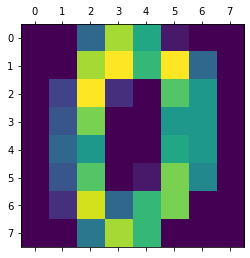

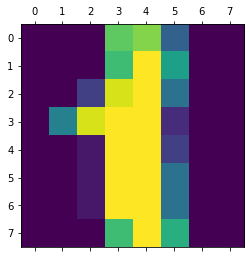

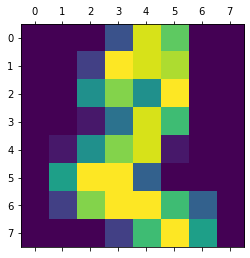

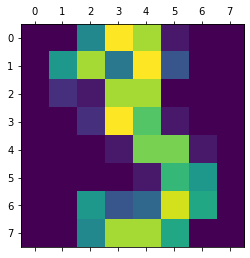

In [5]:
for i in range(4):
  plt.matshow(digit.images[i])

**From above, you can see the images of digits that are stored in digit.images**

In [6]:
df = pd.DataFrame(digit.data)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [7]:
df['target'] = digit.target

In [8]:
df.head()

0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

**Splitting the Dataset**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis = 'columns'),digit.target,test_size = 0.2,random_state=0)

**Understanding LDA**

**Linear Discriminant Analysis** (LDA) a dimensionality reduction technique used to reduce the number of dimensions or features or variables in a dataset while retaining as much information as possible.

Oh wait! PCA does the exact same thing. 
PCA reduces dimensions by focusing on the variables with the most variation.

LDA is a **supervised** learning algorithm which is used for classification.
Here, in LDA we are interested in **maximizing the separability** betweeen the two groups to make the best decision. LDA is like PCA but focuses on maximizing the separability among known categories. 

Here, LDA is a way of reducing dimensionality i.e. the number of variables or features while at the same time preserving as much of the class discriminatory information as possible.



**Why do we need Linear Discriminant Analysis?**


**Scenario:** A pharmaceutical company has developed a drug to help  cancer patients.

**Issue:**  Drug works for some, not for all.

**Solution:** Use LDA and decide whom to give the drug.



**How does it work?**


Linear Discriminant Analysis(LDA) aims to find the maximum separable line which would separate classes.

**How does LDA create new axis?**

It has two criteria to do it -


1.   Maximize the distance between means of different classes.
2.   Minimize the variation or the scatter which is represented by S^2 within each category. \begin{equation*}    \frac{\mu_1^2  - \mu_2^2}{S_1^2  + S_2^2}\end{equation*} 



**Implementing LDA**

In [10]:
lda = LDA(n_components=2)  
X_train_lda = lda.fit_transform(X_train, y_train)  
X_test_lda = lda.transform(X_test)  

In [12]:
df1=pd.DataFrame(X_train_lda)
df1['target']=df['target']
df1.columns=["LD1",'LD2','Digit']
df1.head()

LD1       LD2  Digit
0 -3.678053  0.151762      0
1  0.895780 -1.341624      1
2  3.808197 -2.110307      2
3 -4.932102  2.161233      3
4 -6.127362  1.436849      4

**Visualizing the Class Separation**

<Figure size 1440x1440 with 0 Axes>

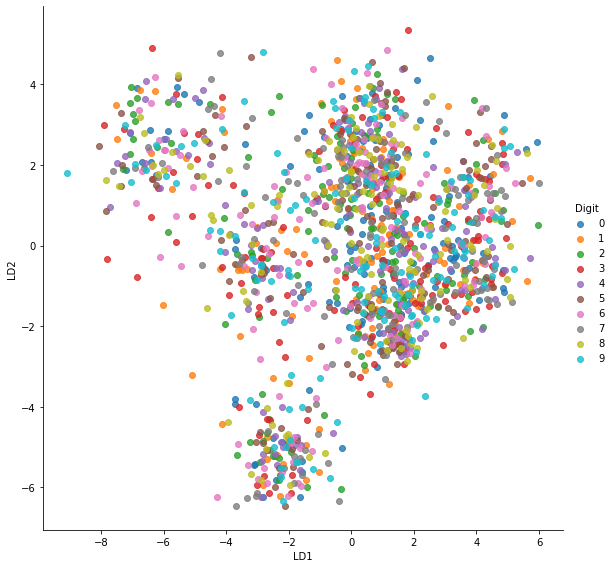

In [13]:
plt.figure(figsize=(20,20))
sns.lmplot(x="LD1", y="LD2", data=df1, hue='Digit',fit_reg=False,height=8)
plt.show()

**Training & Testing**

In [14]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train_lda,y_train)

RandomForestClassifier(n_estimators=20)

**Evaluating the Model Performance**

In [15]:
model.score(X_test_lda,y_test)

0.6138888888888889

In [16]:
y_predicted = model.predict(X_test_lda)

In [17]:
cm = confusion_matrix(y_test,y_predicted)

In [18]:
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  1,  1,  0,  3, 11,  0,  1],
       [ 0,  1, 22,  9,  0,  1,  0,  2,  0,  1],
       [ 0,  0,  4, 22,  0,  2,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 28,  0,  2,  0,  0,  0],
       [ 0,  0,  2,  2,  0, 23,  3,  1,  3,  6],
       [ 0,  2,  0,  0,  1,  1, 38,  0,  1,  1],
       [ 0, 11,  0,  0,  1,  2,  4, 13,  6,  2],
       [ 0,  7,  0,  0,  0,  2,  1,  8, 18,  3],
       [ 0,  0,  1,  4,  0, 18,  0,  2,  4, 12]], dtype=int64)

In [19]:
print('Accuracy: ' + str(accuracy_score(y_test, y_predicted)))  

Accuracy: 0.6138888888888889


In [20]:
sns.heatmap(cm,annot = True)
plt.xlabel('Prediction Values')
plt.ylabel('Real Values')

Text(33.0, 0.5, 'Real Values')